In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

In [2]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d

In [4]:
cube = np.load('example/output/tcube.npz')

In [5]:
t,x,y,z = map(lambda i:cube[i],('t','x','y','z'))

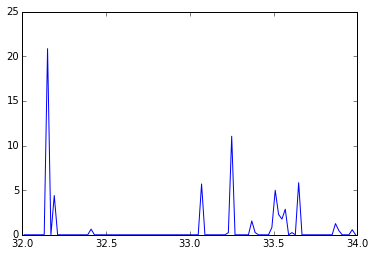

In [6]:
pl.plot(z,t[42,42,:])

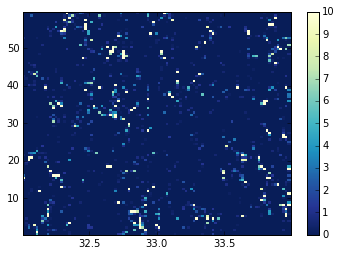

In [50]:
def slice_x(xval):
    pl.pcolormesh(z,y,t[np.argmin(np.abs(x-xval)),:,:],vmax=10)
    pl.colorbar()
    pl.autoscale(tight='true')
interact(slice_x,xval=(min(x),max(x),np.diff(x)[0]))

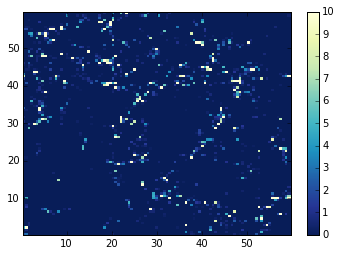

In [51]:
def slice_z(zval):
    pl.pcolormesh(x,y,t[:,:,np.argmin(np.abs(z-zval))],vmax=10)
    pl.colorbar()
    pl.autoscale(tight='true')
interact(slice_z,zval=(min(z),max(z),np.diff(z)[0]))

In [14]:
pspec = np.loadtxt('example/output/pspec.dat')

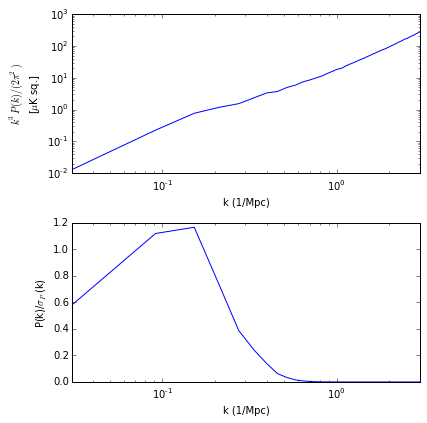

In [53]:
k = pspec[:,0]
Pk = pspec[:,1]
sigmaPk = pspec[:,2]
pl.figure(figsize=(6,6))
pl.subplot(211)
pl.loglog(k,k**3*Pk/(2*np.pi**2),'b-')
pl.xlabel('k (1/Mpc)')
pl.ylabel(r'$k^3P(k)/(2\pi^2)$'+'\n'+r'[$\mu$K sq.]')
pl.xlim((min(k),max(k)))
#pl.loglog(k,k**3*(Pk-sigmaPk)/(2*np.pi**2),'b--')
#pl.loglog(k,k**3*(Pk+sigmaPk)/(2*np.pi**2),'b--')
pl.subplot(212)
pl.semilogx(k,Pk/sigmaPk)
pl.xlabel('k (1/Mpc)')
pl.ylabel(r'P(k)/$\sigma_P$(k)')
pl.xlim((min(k),max(k)))
pl.tight_layout()

In [33]:
pspec_cyl = np.load('example/output/pspec_cyl.npz')

In [36]:
kpar,kprp,pcyl = [pspec_cyl[i] for i in ('kpar','kprp','pcyl')]

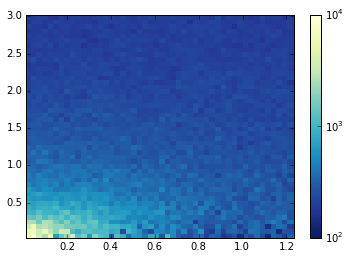

In [54]:
from matplotlib.colors import LogNorm
pl.pcolormesh(kpar,kprp,pcyl,norm=LogNorm(),vmin=1e2)
pl.colorbar()
pl.autoscale(tight=True)